# Hypothesis Testing: Error Handling's Impact on Online Purchase Intention

## 1. Introduction

This notebook implements a comprehensive analysis of Hypothesis 10: "Error handling has no impact on intention to purchase online." Error handling refers to how well an e-commerce platform handles errors and provides clear error messages during the online shopping experience, which could be a critical factor influencing purchase decisions.

## 2. Setting up the Environment



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14



## 3. Data Loading and Preparation



In [3]:
# Load the dataset
df = pd.read_csv('../../data/cleaned/cleaned_survey_data.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of responses: {len(df)}")

# Check for missing values in key columns
error_cols = ['peou_error_1', 'peou_error_2']
intention_cols = ['opi_satisfaction', 'opi_behavior_change', 'opi_convenience', 'opi_value']

missing_data = pd.DataFrame({
    'Missing Values': df[error_cols + intention_cols].isnull().sum(),
    'Percentage': df[error_cols + intention_cols].isnull().sum() / len(df) * 100
})

print("\nMissing values in key columns:")
print(missing_data)

Dataset shape: (825, 134)
Number of responses: 825

Missing values in key columns:
                     Missing Values  Percentage
peou_error_1                      0         0.0
peou_error_2                      0         0.0
opi_satisfaction                  0         0.0
opi_behavior_change               0         0.0
opi_convenience                   0         0.0
opi_value                         0         0.0




## 4.1 Exploratory Data Analysis




Basic statistics for error handling variables:
       peou_error_1  peou_error_2
count    825.000000    825.000000
mean       3.026667      2.953939
std        0.787812      0.823096
min        1.000000      1.000000
25%        3.000000      2.000000
50%        3.000000      3.000000
75%        3.000000      3.000000
max        5.000000      5.000000

Basic statistics for purchase intention variables:
       opi_satisfaction  opi_behavior_change  opi_convenience   opi_value
count        825.000000           825.000000        825.00000  825.000000
mean           3.743030             3.904242          3.84000    3.780606
std            0.818122             0.713459          0.73147    0.759479
min            1.000000             1.000000          1.00000    1.000000
25%            3.000000             4.000000          3.00000    3.000000
50%            4.000000             4.000000          4.00000    4.000000
75%            4.000000             4.000000          4.00000    4.000000
ma

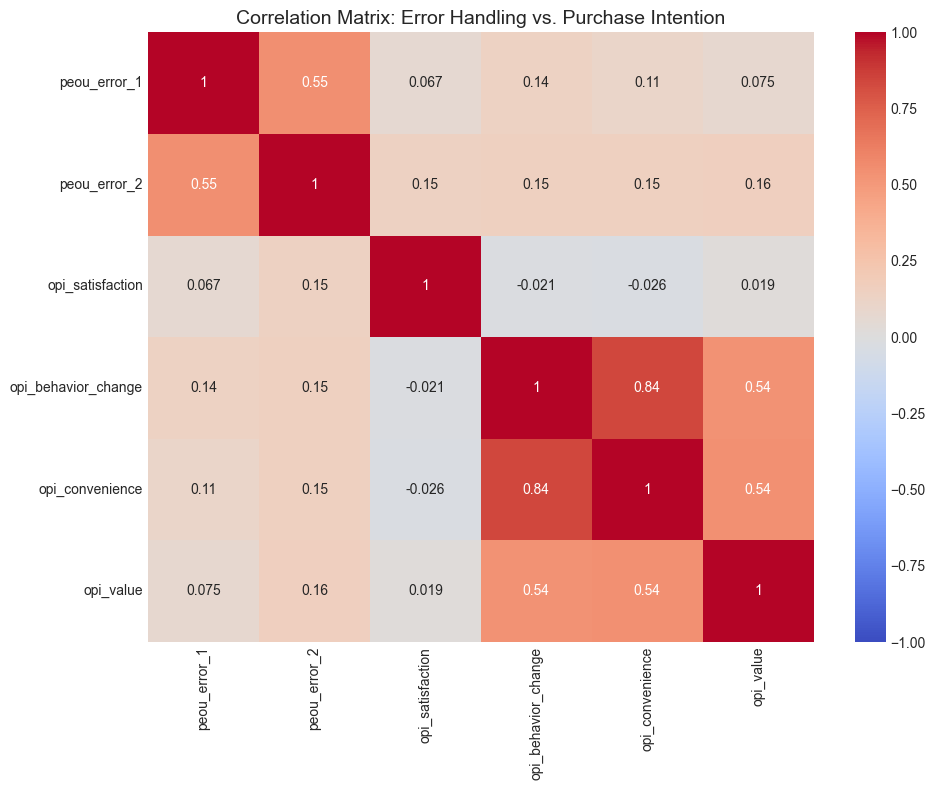


Error Handling Variables Description:
peou_error_1: 'The online platform gives me clear error messages when something goes wrong.'
peou_error_2: 'The system provides helpful instructions to resolve errors during the shopping process.'

Note: Higher values (1-5) indicate better error handling perception

Reliability Analysis:
Correlation between error handling measures: 0.5521
This indicates moderate reliability of our error handling measure.

Correlation of error handling with specific purchase intention aspects:
opi_satisfaction: r = 0.1222, p = 0.0004 (significant)
opi_behavior_change: r = 0.1648, p = 0.0000 (significant)
opi_convenience: r = 0.1466, p = 0.0000 (significant)
opi_value: r = 0.1334, p = 0.0001 (significant)


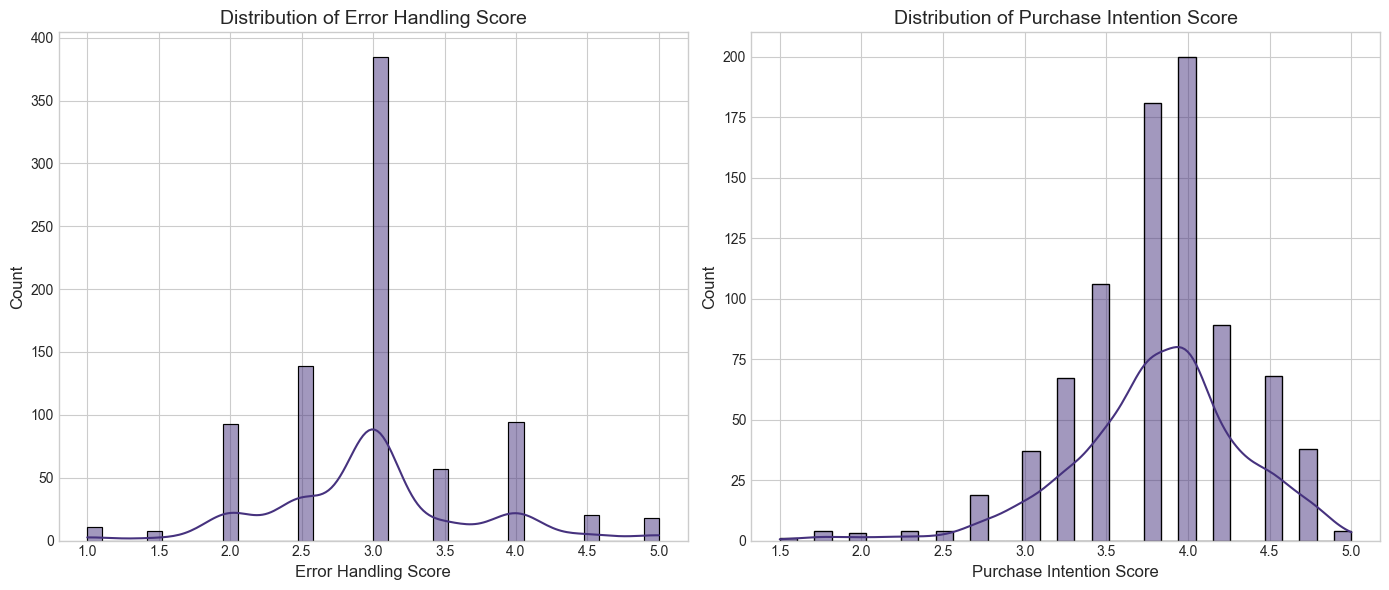

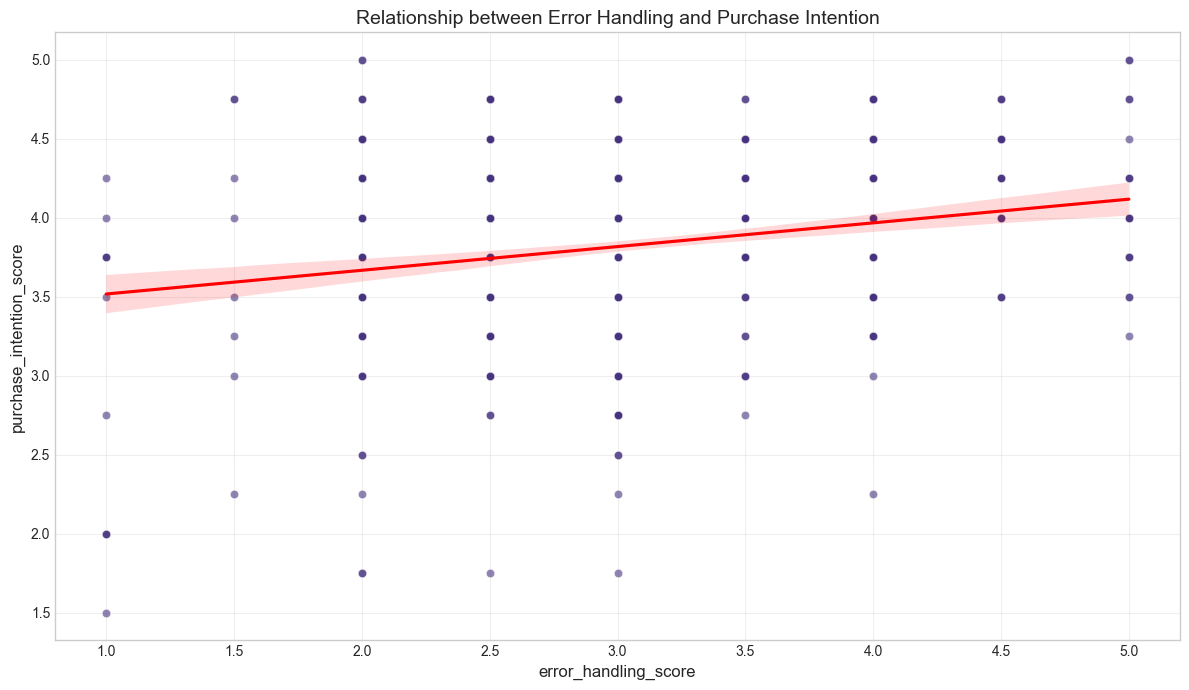

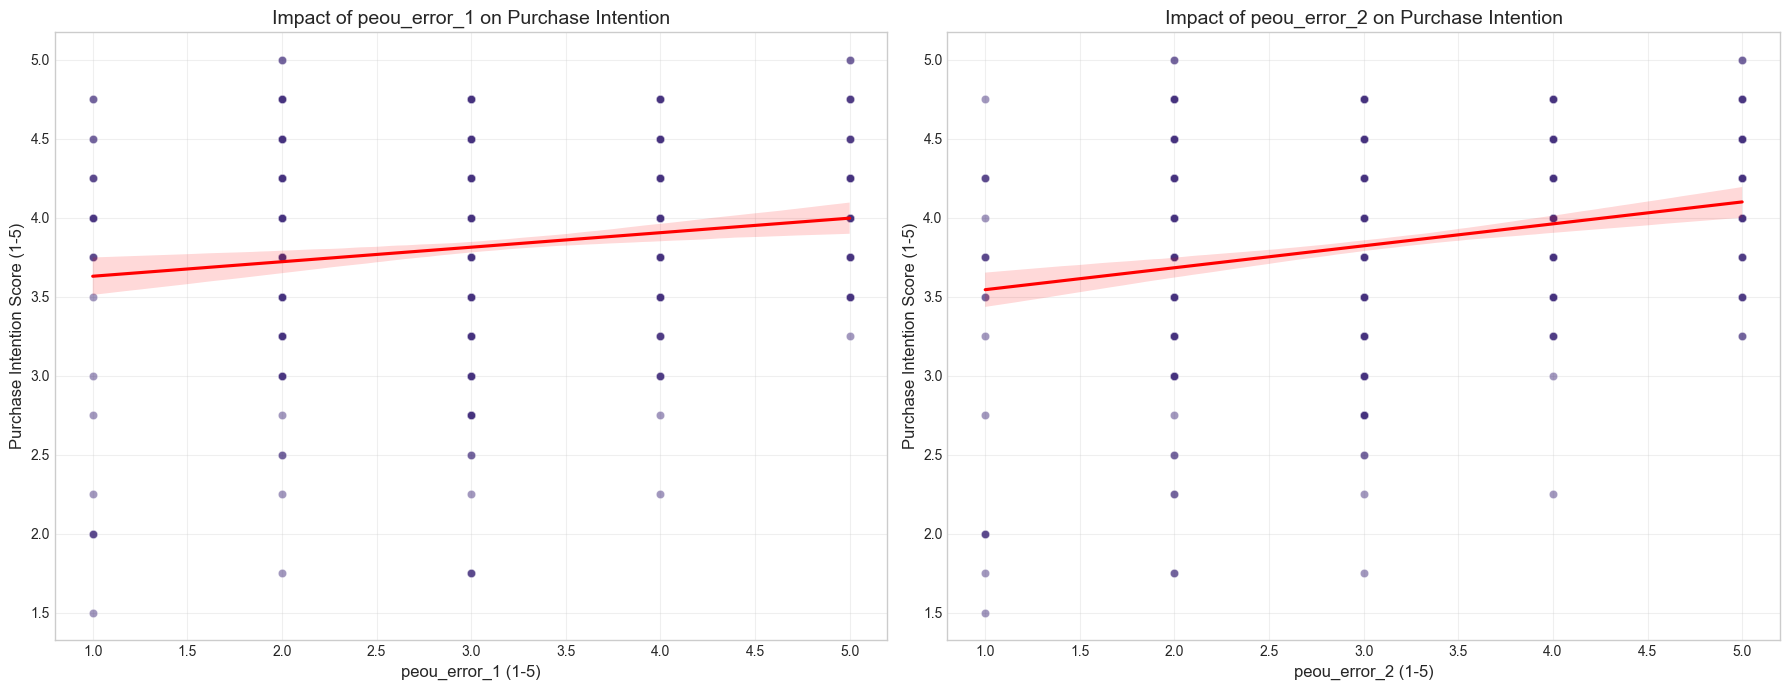

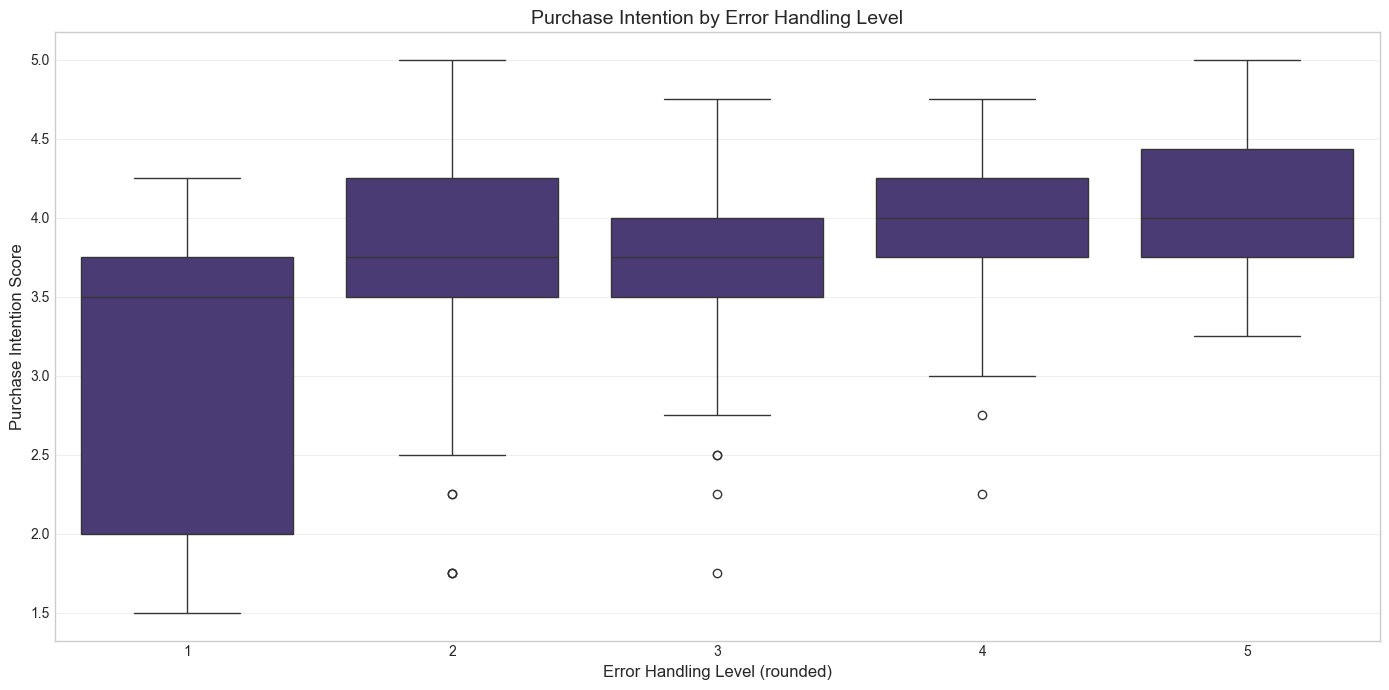

In [4]:
# Display basic statistics for error handling and purchase intention variables
print("\nBasic statistics for error handling variables:")
print(df[error_cols].describe())

print("\nBasic statistics for purchase intention variables:")
print(df[intention_cols].describe())

# Create a correlation matrix for error handling and purchase intention variables
corr_matrix = df[error_cols + intention_cols].corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Error Handling vs. Purchase Intention')
plt.tight_layout()
plt.show()

# Create a composite error handling score (average of both error handling variables)
df['error_handling_score'] = df[error_cols].mean(axis=1)

# Create a composite purchase intention score (average of intention variables)
df['purchase_intention_score'] = df[intention_cols].mean(axis=1)

# Add context for the error handling variables
print("\nError Handling Variables Description:")
print("peou_error_1: 'The online platform gives me clear error messages when something goes wrong.'")
print("peou_error_2: 'The system provides helpful instructions to resolve errors during the shopping process.'")
print("\nNote: Higher values (1-5) indicate better error handling perception")

# Examine reliability of the composite scores
print("\nReliability Analysis:")
error_reliability = np.corrcoef(df['peou_error_1'], df['peou_error_2'])[0,1]
print(f"Correlation between error handling measures: {error_reliability:.4f}")
print(f"This indicates {'high' if error_reliability > 0.7 else 'moderate' if error_reliability > 0.5 else 'low'} reliability of our error handling measure.")

# Calculate specific purchase intention aspects' correlation with error handling
print("\nCorrelation of error handling with specific purchase intention aspects:")
for col in intention_cols:
    corr, p = stats.pearsonr(df['error_handling_score'], df[col])
    print(f"{col}: r = {corr:.4f}, p = {p:.4f} {'(significant)' if p < 0.05 else ''}")

# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot distribution of error handling score
sns.histplot(df['error_handling_score'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Error Handling Score')
axes[0].set_xlabel('Error Handling Score')

# Plot distribution of purchase intention score
sns.histplot(df['purchase_intention_score'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Purchase Intention Score')
axes[1].set_xlabel('Purchase Intention Score')

plt.tight_layout()
plt.show()

# Visualize the relationship between error handling and purchase intention
plt.figure(figsize=(12, 7))
sns.scatterplot(x='error_handling_score', y='purchase_intention_score', data=df, alpha=0.6)
plt.title('Relationship between Error Handling and Purchase Intention')
plt.xlabel('Error Handling Score (1-5)')
plt.ylabel('Purchase Intention Score (1-5)')

# Add regression line
sns.regplot(x='error_handling_score', y='purchase_intention_score', data=df,
           scatter=False, line_kws={"color": "red"})

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Examine individual error handling variables and their relationship with intention
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for i, col in enumerate(error_cols):
    sns.scatterplot(x=col, y='purchase_intention_score', data=df, ax=axes[i], alpha=0.5)
    sns.regplot(x=col, y='purchase_intention_score', data=df, ax=axes[i], 
                scatter=False, line_kws={"color": "red"})
    axes[i].set_title(f'Impact of {col} on Purchase Intention')
    axes[i].set_xlabel(f'{col} (1-5)')
    axes[i].set_ylabel('Purchase Intention Score (1-5)')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create boxplots for different error handling levels and their effect on purchase intention
plt.figure(figsize=(14, 7))
error_levels = df['error_handling_score'].round().astype(int)
sns.boxplot(x=error_levels, y='purchase_intention_score', data=df)
plt.title('Purchase Intention by Error Handling Level')
plt.xlabel('Error Handling Level (rounded)')
plt.ylabel('Purchase Intention Score')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



### 4.2 Reliability Analysis of Error Handling Measures



In [5]:
print("\n### 4.2 Reliability Analysis of Error Handling Measures ###")

# Calculate Cronbach's alpha for error handling variables
from sklearn.preprocessing import scale

# If more than 2 error handling variables, calculate Cronbach's alpha
if len(error_cols) > 1:
    # Standardize variables
    z_scores = scale(df[error_cols])
    
    # Calculate item-total correlations
    total_scores = z_scores.sum(axis=1)
    item_total_corrs = [np.corrcoef(z_scores[:, i], total_scores - z_scores[:, i])[0, 1] 
                        for i in range(z_scores.shape[1])]
    
    # Calculate average inter-item correlation
    inter_item_corrs = []
    for i in range(len(error_cols)):
        for j in range(i+1, len(error_cols)):
            inter_item_corrs.append(np.corrcoef(df[error_cols[i]], df[error_cols[j]])[0, 1])
    avg_inter_item_corr = np.mean(inter_item_corrs)
    
    # Calculate Cronbach's alpha
    n_items = len(error_cols)
    cronbach_alpha = (n_items * avg_inter_item_corr) / (1 + (n_items - 1) * avg_inter_item_corr)
    
    print(f"Cronbach's alpha for error handling measures: {cronbach_alpha:.4f}")
    print(f"Average inter-item correlation: {avg_inter_item_corr:.4f}")
    print("\nItem-Total Correlations:")
    for i, col in enumerate(error_cols):
        print(f"{col}: {item_total_corrs[i]:.4f}")
    
    # Interpret reliability
    if cronbach_alpha >= 0.9:
        print("\nInterpretation: Excellent reliability (α ≥ 0.9)")
    elif cronbach_alpha >= 0.8:
        print("\nInterpretation: Good reliability (0.8 ≤ α < 0.9)")
    elif cronbach_alpha >= 0.7:
        print("\nInterpretation: Acceptable reliability (0.7 ≤ α < 0.8)")
    elif cronbach_alpha >= 0.6:
        print("\nInterpretation: Questionable reliability (0.6 ≤ α < 0.7)")
    elif cronbach_alpha >= 0.5:
        print("\nInterpretation: Poor reliability (0.5 ≤ α < 0.6)")
    else:
        print("\nInterpretation: Unacceptable reliability (α < 0.5)")


### 4.2 Reliability Analysis of Error Handling Measures ###
Cronbach's alpha for error handling measures: 0.7114
Average inter-item correlation: 0.5521

Item-Total Correlations:
peou_error_1: 0.5521
peou_error_2: 0.5521

Interpretation: Acceptable reliability (0.7 ≤ α < 0.8)




## 5. Hypothesis Testing

### 5.1 Pearson Correlation Test



In [6]:
# Calculate Pearson correlation between error handling and purchase intention
correlation, p_value = stats.pearsonr(df['error_handling_score'], df['purchase_intention_score'])

print("Pearson Correlation Test Results:")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.6f}")

# Determine statistical significance
alpha = 0.05
if p_value < alpha:
    print(f"The correlation is statistically significant (p < {alpha}).")
    print("Reject the null hypothesis: Error handling has an impact on purchase intention.")
else:
    print(f"The correlation is not statistically significant (p > {alpha}).")
    print("Fail to reject the null hypothesis: No evidence that error handling impacts purchase intention.")

Pearson Correlation Test Results:
Correlation coefficient: 0.2051
P-value: 0.000000
The correlation is statistically significant (p < 0.05).
Reject the null hypothesis: Error handling has an impact on purchase intention.




### 5.2 Power Analysis to the Correlation Test



In [7]:
from statsmodels.stats.power import TTestPower

# Minimum effect size of interest (e.g., r = 0.2 for a small-to-medium effect)
min_effect_size = 0.2

# Convert correlation to equivalent t-statistic for power analysis
t_stat = correlation * np.sqrt((len(df) - 2) / (1 - correlation**2))

# Calculate power using t-test approach (appropriate for Pearson correlation)
power_analysis = TTestPower()
# Use nobs-2 for degrees of freedom in correlation test
achieved_power = power_analysis.power(effect_size=abs(t_stat)/np.sqrt(len(df)), 
                                     nobs=len(df), 
                                     alpha=alpha)

# Calculate required sample size for detecting the minimum effect size with 80% power
# Convert min correlation to equivalent effect size
min_t_effect = min_effect_size * np.sqrt((200 - 2) / (1 - min_effect_size**2)) / np.sqrt(200)
required_n = power_analysis.solve_power(effect_size=min_t_effect, 
                                       power=0.8, 
                                       alpha=alpha)

print("\nStatistical Power Analysis:")
print(f"Achieved power for detected correlation (r = {correlation:.3f}): {achieved_power:.3f}")
print(f"Required sample size to detect r = {min_effect_size} with 80% power: {int(required_n)}")

if achieved_power < 0.8:
    print("Warning: The analysis may be underpowered. Interpret non-significant results cautiously.")
else:
    print("The analysis has adequate statistical power.")


Statistical Power Analysis:
Achieved power for detected correlation (r = 0.205): 1.000
Required sample size to detect r = 0.2 with 80% power: 192
The analysis has adequate statistical power.




### 5.3 Simple Linear Regression



In [8]:
# Perform simple linear regression
X = df['error_handling_score'].values.reshape(-1, 1)
y = df['purchase_intention_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nSimple Linear Regression Results:")
print(f"Coefficient (Slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

# Create a more detailed model using statsmodels for better statistical insights
X_with_const = sm.add_constant(df['error_handling_score'])
sm_model = sm.OLS(df['purchase_intention_score'], X_with_const).fit()

print("\nDetailed Regression Results:")
print(sm_model.summary())

# Interpret the results
print("\nRegression Interpretation:")
if sm_model.pvalues[1] < 0.05:
    print("The relationship between error handling and purchase intention is statistically significant.")
    print(f"For every 1-unit increase in error handling score, purchase intention increases by {sm_model.params[1]:.4f} units.")
    print("This suggests that better error handling (higher score) positively impacts purchase intention.")
    print("We reject the null hypothesis: Error handling has a significant impact on intention to purchase online.")
else:
    print("The relationship between error handling and purchase intention is not statistically significant.")
    print("We fail to reject the null hypothesis: No evidence that error handling impacts intention to purchase online.")


Simple Linear Regression Results:
Coefficient (Slope): 0.1452
Intercept: 3.3952
R-squared: 0.0367
Root Mean Squared Error: 0.4943

Detailed Regression Results:
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.042
Model:                                  OLS   Adj. R-squared:                  0.041
Method:                       Least Squares   F-statistic:                     36.15
Date:                      Sun, 11 May 2025   Prob (F-statistic):           2.75e-09
Time:                              17:05:35   Log-Likelihood:                -611.84
No. Observations:                       825   AIC:                             1228.
Df Residuals:                           823   BIC:                             1237.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                               



### 5.4 Non-Linear Relationship Testing




### 5.4 Non-Linear Relationship Testing ###
Polynomial Regression Results:
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.042
Model:                                  OLS   Adj. R-squared:                  0.040
Method:                       Least Squares   F-statistic:                     18.06
Date:                      Sun, 11 May 2025   Prob (F-statistic):           2.11e-08
Time:                              17:05:35   Log-Likelihood:                -611.84
No. Observations:                       825   AIC:                             1230.
Df Residuals:                           822   BIC:                             1244.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

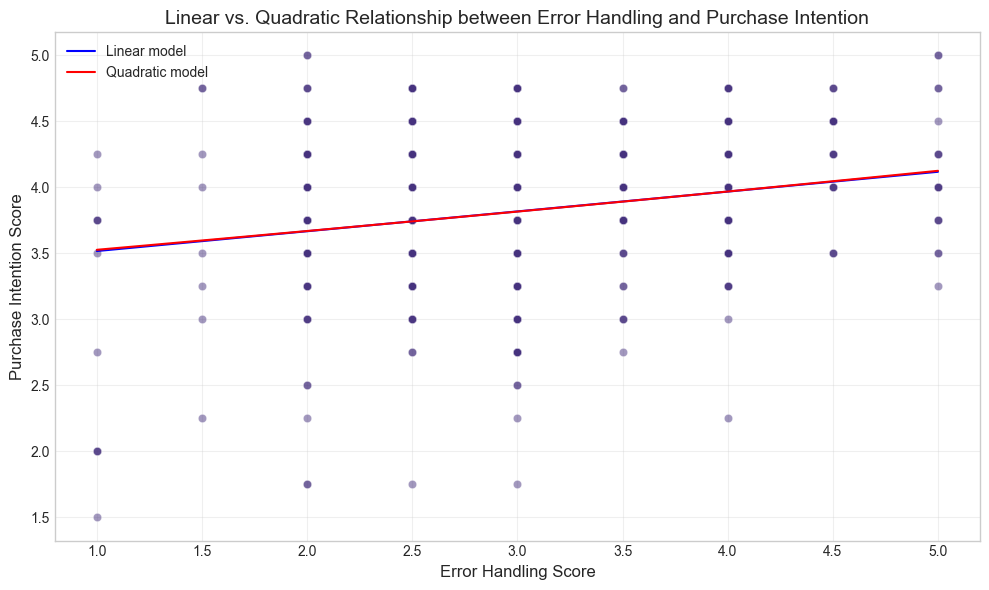

In [9]:
# Test for non-linear relationships
print("\n### 5.4 Non-Linear Relationship Testing ###")

# Create polynomial features
X_poly = df['error_handling_score'].values.reshape(-1, 1)
X_poly_squared = np.column_stack((X_poly, X_poly**2))
X_poly_with_const = sm.add_constant(X_poly_squared)

# Fit quadratic model
poly_model = sm.OLS(df['purchase_intention_score'], X_poly_with_const).fit()

print("Polynomial Regression Results:")
print(poly_model.summary())

# Compare models
print("\nModel Comparison:")
print(f"Linear R-squared: {sm_model.rsquared:.4f}")
print(f"Quadratic R-squared: {poly_model.rsquared:.4f}")
print(f"R-squared improvement: {poly_model.rsquared - sm_model.rsquared:.4f}")

# Test if the improvement is significant
if poly_model.pvalues[2] < 0.05:
    print(f"The quadratic term is significant (p = {poly_model.pvalues[2]:.4f})")
    print("The relationship between error handling and purchase intention is non-linear.")
    
    # Interpret the direction
    if poly_model.params[2] > 0:
        print("The positive quadratic term indicates that the effect accelerates at higher error handling values.")
    else:
        print("The negative quadratic term indicates diminishing returns at higher error handling values.")
else:
    print(f"The quadratic term is not significant (p = {poly_model.pvalues[2]:.4f})")
    print("No evidence of a non-linear relationship. The linear model is sufficient.")

# Visualize both models
plt.figure(figsize=(10, 6))
sns.scatterplot(x='error_handling_score', y='purchase_intention_score', data=df, alpha=0.5)

# Add linear regression line
x_range = np.linspace(df['error_handling_score'].min(), df['error_handling_score'].max(), 100)
y_linear = sm_model.params[0] + sm_model.params[1] * x_range
plt.plot(x_range, y_linear, color='blue', label='Linear model')

# Add polynomial regression curve
y_poly = poly_model.params[0] + poly_model.params[1] * x_range + poly_model.params[2] * x_range**2
plt.plot(x_range, y_poly, color='red', label='Quadratic model')

plt.title('Linear vs. Quadratic Relationship between Error Handling and Purchase Intention')
plt.xlabel('Error Handling Score')
plt.ylabel('Purchase Intention Score')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



### 5.5 Robust Regression Analysis



In [10]:
# Perform robust regression to handle potential outliers
print("\n### 5.5 Robust Regression Analysis ###")

import statsmodels.formula.api as smf
from statsmodels.robust.robust_linear_model import RLM

# Fit robust regression model (Huber's T)
X_robust = sm.add_constant(df['error_handling_score'])
robust_model = RLM(df['purchase_intention_score'], X_robust, M=sm.robust.norms.HuberT()).fit()

print("Robust Regression Results:")
print(robust_model.summary())
print(f"Robust coefficient: {robust_model.params[1]:.4f}")

# Compare with OLS
print("\nComparing OLS vs. Robust Regression:")
print(f"OLS coefficient: {sm_model.params[1]:.4f}")
print(f"Robust coefficient: {robust_model.params[1]:.4f}")
print(f"Difference: {abs(sm_model.params[1] - robust_model.params[1]):.4f}")

if abs(sm_model.params[1] - robust_model.params[1]) > 0.05:
    print("The substantial difference between OLS and robust regression suggests outliers may be influencing the results.")
else:
    print("OLS and robust regression give similar results, suggesting outliers are not significantly impacting the analysis.")


### 5.5 Robust Regression Analysis ###
Robust Regression Results:
                       Robust linear Model Regression Results                       
Dep. Variable:     purchase_intention_score   No. Observations:                  825
Model:                                  RLM   Df Residuals:                      823
Method:                                IRLS   Df Model:                            1
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Sun, 11 May 2025                                         
Time:                              17:05:35                                         
No. Iterations:                          18                                         
                           coef    std err          z      P>|z|      [0.025      0



### 5.6 Regression Diagnostics




### 5.6 Regression Diagnostics ###


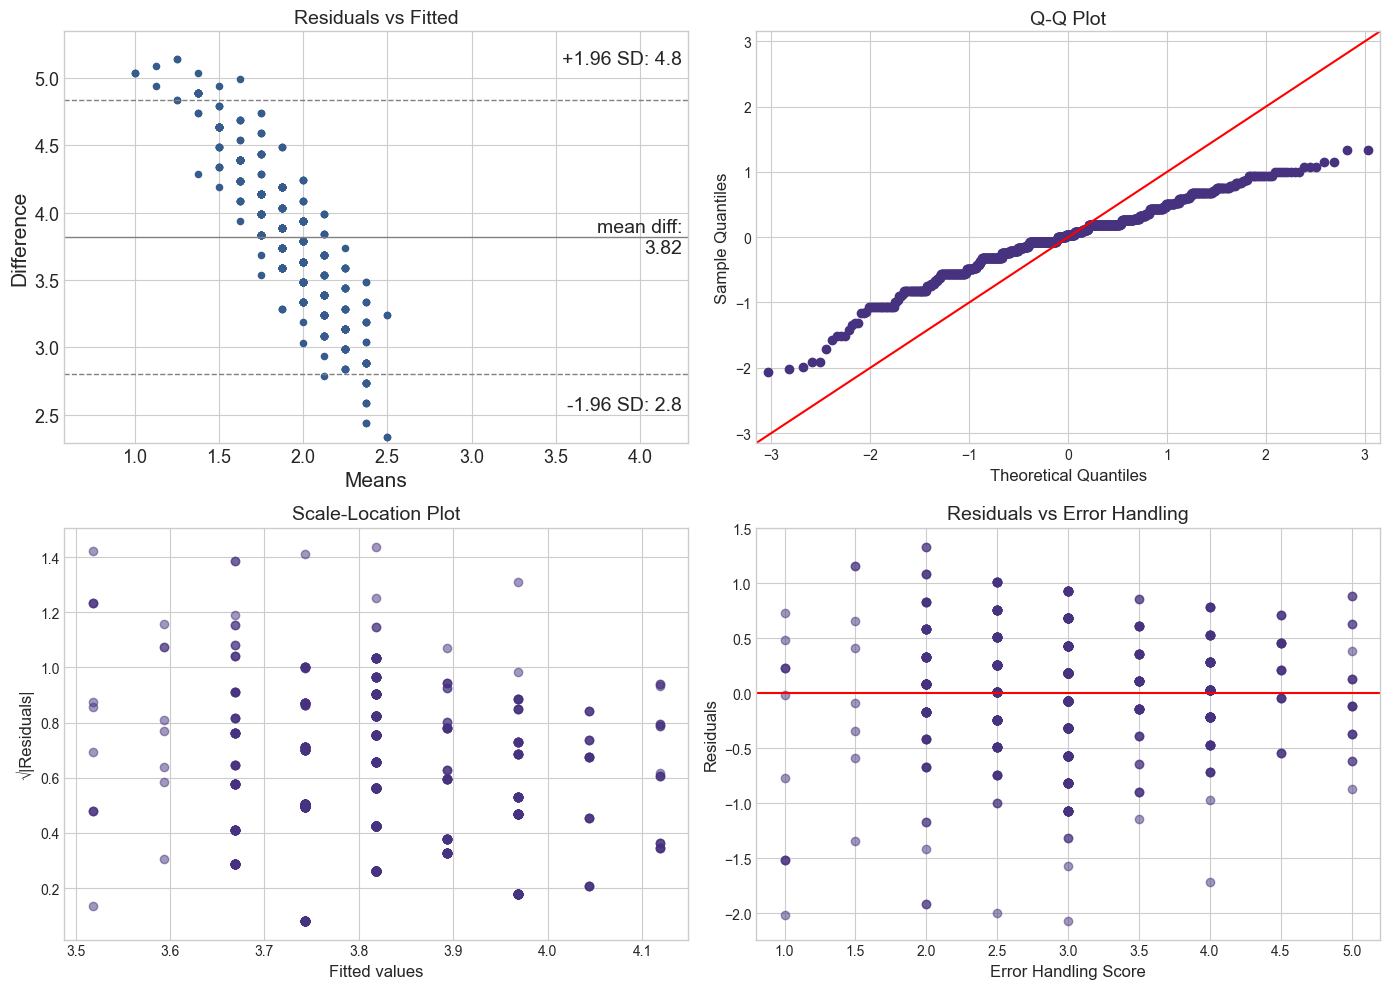


Breusch-Pagan test for heteroscedasticity:
LM statistic: 22.6223
p-value: 0.000002
Conclusion: Heteroscedasticity present

D'Agostino-Pearson test for normality of residuals:
K2 statistic: 62.1072
p-value: 0.000000
Conclusion: Residuals are not normally distributed


In [11]:
# Residual analysis to check regression assumptions
print("\n### 5.6 Regression Diagnostics ###")

# Get residuals
residuals = sm_model.resid
fitted_values = sm_model.fittedvalues

# Create a 2x2 plot for residual diagnostics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(fitted_values, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='-')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')
sm.graphics.mean_diff_plot(fitted_values, residuals, ax=axes[0, 0])

# 2. Q-Q plot
sm.qqplot(residuals, line='45', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# 3. Scale-Location Plot
sqrt_abs_resid = np.sqrt(np.abs(residuals))
axes[1, 0].scatter(fitted_values, sqrt_abs_resid, alpha=0.5)
axes[1, 0].set_xlabel('Fitted values')
axes[1, 0].set_ylabel('√|Residuals|')
axes[1, 0].set_title('Scale-Location Plot')

# 4. Residuals vs Error Handling
axes[1, 1].scatter(df['error_handling_score'], residuals, alpha=0.5)
axes[1, 1].axhline(y=0, color='r', linestyle='-')
axes[1, 1].set_xlabel('Error Handling Score')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Error Handling')

plt.tight_layout()
plt.show()

# Test for homoscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, sm_model.model.exog)
print(f"\nBreusch-Pagan test for heteroscedasticity:")
print(f"LM statistic: {bp_test[0]:.4f}")
print(f"p-value: {bp_test[1]:.6f}")
print(f"Conclusion: {'Heteroscedasticity present' if bp_test[1] < 0.05 else 'Homoscedasticity assumption satisfied'}")

# Test for normality of residuals
from scipy import stats

k2, p_value = stats.normaltest(residuals)
print(f"\nD'Agostino-Pearson test for normality of residuals:")
print(f"K2 statistic: {k2:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Conclusion: {'Residuals are not normally distributed' if p_value < 0.05 else 'Residuals are normally distributed'}")



### 5.7 Multiple Linear Regression (Using Both Error Handling Variables)



In [12]:
# Perform multiple linear regression with both error handling variables
X_multi = df[error_cols]
y_multi = df['purchase_intention_score']

# Add a constant
X_multi_with_const = sm.add_constant(X_multi)

# Fit the model
multi_model = sm.OLS(y_multi, X_multi_with_const).fit()

print("\nMultiple Linear Regression Results:")
print(multi_model.summary())

# Check for significance of individual predictors
print("\nSignificance of Individual Error Handling Variables:")
for i, var in enumerate(error_cols, 1):
    p_val = multi_model.pvalues[i]
    coef = multi_model.params[i]
    print(f"{var}: Coefficient = {coef:.4f}, p-value = {p_val:.6f}, {'Significant' if p_val < 0.05 else 'Not Significant'}")

# Calculate partial correlations
print("\nPartial Correlations:")
for col in error_cols:
    others = [c for c in error_cols if c != col]
    
    # Include both original intention columns and the composite score
    X_partial = df[others + intention_cols + ['purchase_intention_score']].copy()
    
    # Regress X on other predictors
    X_partial_with_const = sm.add_constant(X_partial[others])
    model_X = sm.OLS(df[col], X_partial_with_const).fit()
    residuals_X = model_X.resid
    
    # Regress Y on other predictors
    model_Y = sm.OLS(X_partial['purchase_intention_score'], X_partial_with_const).fit()
    residuals_Y = model_Y.resid
    
    # Calculate correlation between residuals
    partial_corr = stats.pearsonr(residuals_X, residuals_Y)[0]
    print(f"Partial correlation between {col} and purchase intention: {partial_corr:.4f}")


Multiple Linear Regression Results:
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.049
Model:                                  OLS   Adj. R-squared:                  0.047
Method:                       Least Squares   F-statistic:                     21.15
Date:                      Sun, 11 May 2025   Prob (F-statistic):           1.11e-09
Time:                              17:05:35   Log-Likelihood:                -608.88
No. Observations:                       825   AIC:                             1224.
Df Residuals:                           822   BIC:                             1238.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------



### 5.8 Hierarchical Regression Analysis



In [13]:
print("\n### 5.8 Hierarchical Regression Analysis ###")

# Step 1: Control variables
control_vars = []
if 'gender_encoded' in df.columns:
    control_vars.append('gender_encoded')
if 'age_encoded' in df.columns:
    control_vars.append('age_encoded')
if 'education_encoded' in df.columns:
    control_vars.append('education_encoded')

# If we have control variables, run a baseline model
if control_vars:
    X_control = sm.add_constant(df[control_vars])
    control_model = sm.OLS(df['purchase_intention_score'], X_control).fit()
    print("Step 1: Control Variables Only")
    print(control_model.summary())
    baseline_r2 = control_model.rsquared
else:
    baseline_r2 = 0
    print("Step 1: No control variables available")

# Step 2: Add error handling variables
if control_vars:
    X_step2 = sm.add_constant(df[control_vars + error_cols])
else:
    X_step2 = X_multi_with_const
    
step2_model = sm.OLS(df['purchase_intention_score'], X_step2).fit()
print("\nStep 2: Adding Error Handling Variables")
print(step2_model.summary())

# Calculate R-squared change
r2_change = step2_model.rsquared - baseline_r2
f_change = (r2_change / len(error_cols)) / ((1 - step2_model.rsquared) / (step2_model.df_resid))
p_change = 1 - stats.f.cdf(f_change, len(error_cols), step2_model.df_resid)

print("\nHierarchical Regression Results:")
print(f"R-squared change: {r2_change:.4f}")
print(f"F-change: {f_change:.4f}")
print(f"p-value for change: {p_change:.6f}")

if p_change < 0.05:
    print("Error handling variables significantly improve model fit beyond control variables.")
else:
    print("Error handling variables do not significantly improve model fit beyond control variables.")


### 5.8 Hierarchical Regression Analysis ###
Step 1: Control Variables Only
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.018
Model:                                  OLS   Adj. R-squared:                  0.014
Method:                       Least Squares   F-statistic:                     4.994
Date:                      Sun, 11 May 2025   Prob (F-statistic):            0.00194
Time:                              17:05:36   Log-Likelihood:                -622.11
No. Observations:                       825   AIC:                             1252.
Df Residuals:                           821   BIC:                             1271.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025



## 6. Advanced Analysis: Error Handling Impact by User Groups



In [14]:
# Check if error handling impact differs by user demographics

# By gender (if available)
if 'gender_encoded' in df.columns:
    print("\nAnalysis by Gender:")
    for gender in df['gender_encoded'].unique():
        gender_df = df[df['gender_encoded'] == gender]
        corr, p_val = stats.pearsonr(gender_df['error_handling_score'], gender_df['purchase_intention_score'])
        print(f"Gender {gender}: Correlation = {corr:.4f}, p-value = {p_val:.6f}")

# By age group (if available)
if 'age_encoded' in df.columns:
    print("\nAnalysis by Age Group:")
    for age in df['age_encoded'].unique():
        age_df = df[df['age_encoded'] == age]
        corr, p_val = stats.pearsonr(age_df['error_handling_score'], age_df['purchase_intention_score'])
        print(f"Age group {age}: Correlation = {corr:.4f}, p-value = {p_val:.6f}")

# By whether they've made purchases during crisis
if 'opi_purchased?' in df.columns:
    print("\nAnalysis by Crisis Purchase Experience:")
    for purchase in [0, 1]:
        purchase_df = df[df['opi_purchased?'] == purchase]
        if len(purchase_df) > 5:  # Ensure enough data points for correlation
            corr, p_val = stats.pearsonr(purchase_df['error_handling_score'], purchase_df['purchase_intention_score'])
            print(f"Crisis purchase = {purchase}: Correlation = {corr:.4f}, p-value = {p_val:.6f}")


Analysis by Gender:
Gender 0: Correlation = 0.1528, p-value = 0.000328
Gender 1: Correlation = 0.3129, p-value = 0.000000
Gender 2: Correlation = 0.2748, p-value = 0.725175

Analysis by Age Group:
Age group 1: Correlation = 0.1911, p-value = 0.000001
Age group 0: Correlation = 0.3801, p-value = 0.000003
Age group 2: Correlation = -0.2170, p-value = 0.142942
Age group 3: Correlation = nan, p-value = nan

Analysis by Crisis Purchase Experience:
Crisis purchase = 0: Correlation = 0.3363, p-value = 0.086336
Crisis purchase = 1: Correlation = 0.1994, p-value = 0.000000




## 7.1 Mediation Analysis: Does Perceived Usefulness Mediate Error Handling's Effect?




## 7.1 Mediation Analysis with Bootstrap CI
Mediation Analysis Results:

Direct Effect (Error Handling → Purchase Intention):
c path: b = 0.1501, p = 0.0000

Path A (Error Handling → Usefulness):
a path: b = 0.4052, p = 0.0000

Path B (Usefulness → Purchase Intention, controlling for Error Handling):
b path: b = 0.2128, p = 0.0000

Direct Effect after controlling for the mediator:
c' path: b = 0.0639, p = 0.0229

Effect Calculations:
Indirect Effect (a*b): 0.0862
Total Effect (c): 0.1501
Proportion of Effect Mediated: 0.5745 (57.45%)

Bootstrap 95% CI for Indirect Effect: [0.0496, 0.1278]
The indirect effect is statistically significant (CI does not include zero).

Mediation Analysis Interpretation:
✓ PARTIAL MEDIATION: Error handling affects purchase intention both directly and indirectly through perceived usefulness.


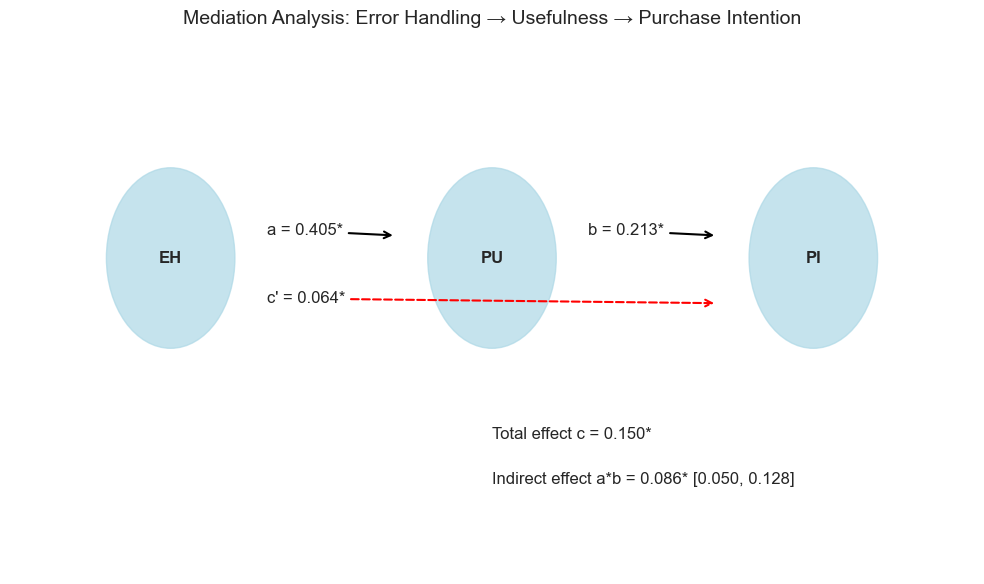

In [15]:
print("\n## 7.1 Mediation Analysis with Bootstrap CI")

# Create a composite perceived usefulness score if it doesn't exist
usefulness_cols = ['pu_product_1', 'pu_product_2', 'pu_convenience_1', 'pu_convenience_2', 
                   'pu_cost_1', 'pu_cost_2', 'pu_info_1', 'pu_info_2']
df['usefulness_score'] = df[usefulness_cols].mean(axis=1)

# Step 1: Error Handling → Purchase Intention (c path)
model_direct = sm.OLS(df['purchase_intention_score'], 
                      sm.add_constant(df['error_handling_score'])).fit()

# Step 2: Error Handling → Perceived Usefulness (a path)
model_a = sm.OLS(df['usefulness_score'], 
                 sm.add_constant(df['error_handling_score'])).fit()

# Step 3: Error Handling + Perceived Usefulness → Purchase Intention (b path)
X_mediation = pd.DataFrame({
    'error_handling': df['error_handling_score'],
    'usefulness': df['usefulness_score']
})
model_mediation = sm.OLS(df['purchase_intention_score'], 
                         sm.add_constant(X_mediation)).fit()

print("Mediation Analysis Results:")
print("\nDirect Effect (Error Handling → Purchase Intention):")
print(f"c path: b = {model_direct.params[1]:.4f}, p = {model_direct.pvalues[1]:.4f}")

print("\nPath A (Error Handling → Usefulness):")
print(f"a path: b = {model_a.params[1]:.4f}, p = {model_a.pvalues[1]:.4f}")

print("\nPath B (Usefulness → Purchase Intention, controlling for Error Handling):")
print(f"b path: b = {model_mediation.params[2]:.4f}, p = {model_mediation.pvalues[2]:.4f}")

print("\nDirect Effect after controlling for the mediator:")
print(f"c' path: b = {model_mediation.params[1]:.4f}, p = {model_mediation.pvalues[1]:.4f}")

# Calculate indirect effect
indirect_effect = model_a.params[1] * model_mediation.params[2]

# Calculate total effect
total_effect = model_direct.params[1]

# Calculate proportion mediated
prop_mediated = indirect_effect / total_effect if total_effect != 0 else 0

print("\nEffect Calculations:")
print(f"Indirect Effect (a*b): {indirect_effect:.4f}")
print(f"Total Effect (c): {total_effect:.4f}")
print(f"Proportion of Effect Mediated: {prop_mediated:.4f} ({prop_mediated*100:.2f}%)")

# Bootstrap confidence interval for indirect effect
np.random.seed(42)  # For reproducibility
n_bootstrap = 5000
indirect_effects = []

for i in range(n_bootstrap):
    # Sample with replacement
    indices = np.random.choice(len(df), len(df), replace=True)
    sample_df = df.iloc[indices]
    
    # Path a
    a_model = sm.OLS(sample_df['usefulness_score'], 
                    sm.add_constant(sample_df['error_handling_score'])).fit()
    a_path = a_model.params[1]
    
    # Path b
    X_med = pd.DataFrame({
        'error_handling': sample_df['error_handling_score'],
        'usefulness': sample_df['usefulness_score']
    })
    b_model = sm.OLS(sample_df['purchase_intention_score'], 
                    sm.add_constant(X_med)).fit()
    b_path = b_model.params[2]
    
    # Indirect effect
    indirect_effects.append(a_path * b_path)

# Calculate 95% confidence interval
ci_lower = np.percentile(indirect_effects, 2.5)
ci_upper = np.percentile(indirect_effects, 97.5)

print(f"\nBootstrap 95% CI for Indirect Effect: [{ci_lower:.4f}, {ci_upper:.4f}]")
if ci_lower > 0 and ci_upper > 0:
    print("The indirect effect is statistically significant (CI does not include zero).")
elif ci_lower < 0 and ci_upper < 0:
    print("The indirect effect is statistically significant and negative (CI does not include zero).")
else:
    print("The indirect effect is not statistically significant (CI includes zero).")

# Interpretation
print("\nMediation Analysis Interpretation:")
if ci_lower > 0 or ci_upper < 0:  # If CI doesn't contain 0
    if model_mediation.pvalues[1] < 0.05:
        print("✓ PARTIAL MEDIATION: Error handling affects purchase intention both directly and indirectly through perceived usefulness.")
    else:
        print("✓ FULL MEDIATION: Error handling affects purchase intention entirely through perceived usefulness.")
else:
    if model_direct.pvalues[1] < 0.05:
        print("✗ NO MEDIATION: Error handling affects purchase intention directly, not through perceived usefulness.")
    else:
        print("✗ NO EFFECT: Error handling does not significantly affect purchase intention.")

# Visualization of mediation model
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 12

# Create nodes
nodes = {
    'EH': (0, 0),  # Error Handling
    'PU': (1, 0),  # Perceived Usefulness
    'PI': (2, 0)   # Purchase Intention
}

# Draw nodes
for name, (x, y) in nodes.items():
    circle = plt.Circle((x, y), 0.2, fill=True, color='lightblue', alpha=0.7)
    plt.gca().add_patch(circle)
    plt.text(x, y, name, ha='center', va='center', fontweight='bold')

# Draw arrows with coefficients
# a path
plt.annotate(f"a = {model_a.params[1]:.3f}{'*' if model_a.pvalues[1] < 0.05 else ''}",
             xy=(0.7, 0.05), xytext=(0.3, 0.05),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# b path
plt.annotate(f"b = {model_mediation.params[2]:.3f}{'*' if model_mediation.pvalues[2] < 0.05 else ''}",
             xy=(1.7, 0.05), xytext=(1.3, 0.05),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# c' path (direct effect)
plt.annotate(f"c' = {model_mediation.params[1]:.3f}{'*' if model_mediation.pvalues[1] < 0.05 else ''}",
             xy=(1.7, -0.1), xytext=(0.3, -0.1),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5, ls='--'))

# Total effect
plt.annotate(f"Total effect c = {total_effect:.3f}{'*' if model_direct.pvalues[1] < 0.05 else ''}",
             xy=(1, -0.4))

# Indirect effect
plt.annotate(f"Indirect effect a*b = {indirect_effect:.3f}" + 
             (f"* [{ci_lower:.3f}, {ci_upper:.3f}]" if ci_lower > 0 or ci_upper < 0 else ""),
             xy=(1, -0.5))

# Configure plot
plt.title('Mediation Analysis: Error Handling → Usefulness → Purchase Intention')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.7, 0.5)
plt.axis('off')
plt.tight_layout()
plt.show()



## 7.2 Moderation Analysis




## 7.2 Moderation Analysis: Do Other Factors Moderate Error Handling's Effect?

### Testing moderation by Risk Perception (risk_security_1) ###
Moderation Model Summary:
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.158
Model:                                  OLS   Adj. R-squared:                  0.155
Method:                       Least Squares   F-statistic:                     51.49
Date:                      Sun, 11 May 2025   Prob (F-statistic):           1.69e-30
Time:                              17:05:48   Log-Likelihood:                -558.46
No. Observations:                       825   AIC:                             1125.
Df Residuals:                           821   BIC:                             1144.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                     

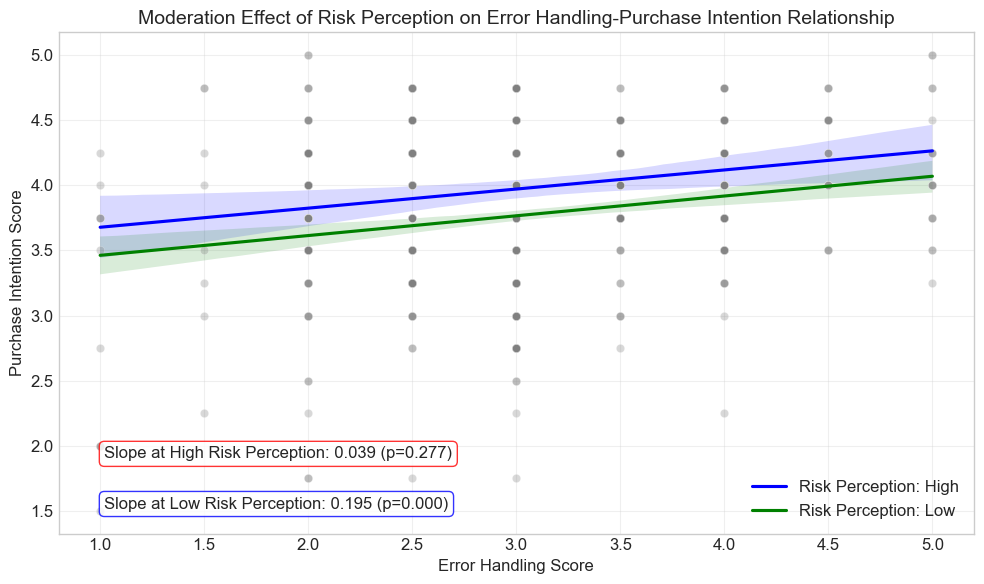


### Testing moderation by Tech Proficiency (peou_learning_1) ###
Moderation Model Summary:
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.067
Model:                                  OLS   Adj. R-squared:                  0.064
Method:                       Least Squares   F-statistic:                     19.79
Date:                      Sun, 11 May 2025   Prob (F-statistic):           2.14e-12
Time:                              17:05:48   Log-Likelihood:                -600.77
No. Observations:                       825   AIC:                             1210.
Df Residuals:                           821   BIC:                             1228.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t 

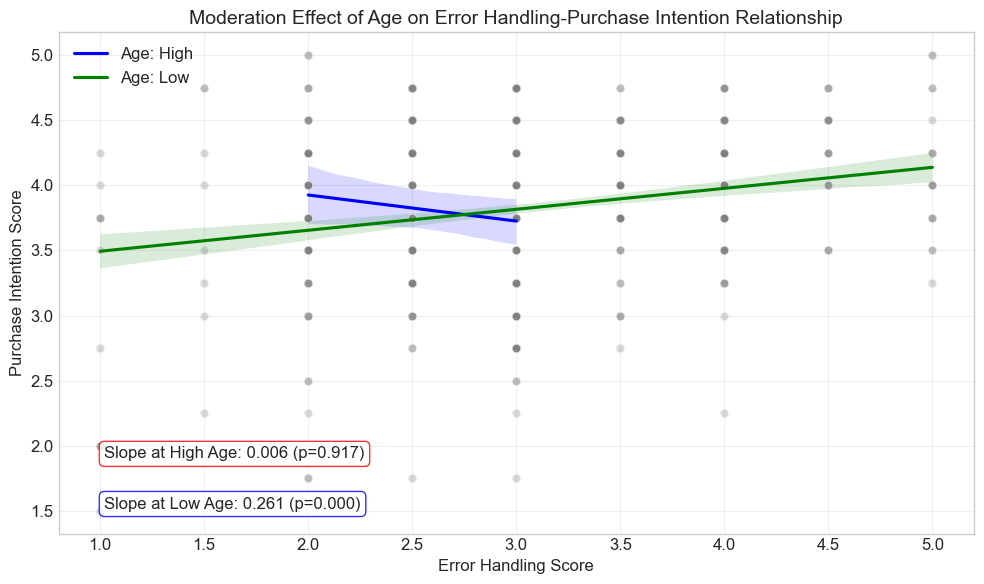

In [16]:
# Improved moderation analysis code
print("\n## 7.2 Moderation Analysis: Do Other Factors Moderate Error Handling's Effect?")

# Select potential moderators to test
moderators = {
    'Risk Perception': 'risk_security_1',
    'Tech Proficiency': 'peou_learning_1',
    'Age': 'age_encoded'
}

for mod_name, mod_col in moderators.items():
    # Skip if moderator not in dataset
    if mod_col not in df.columns:
        continue
        
    print(f"\n### Testing moderation by {mod_name} ({mod_col}) ###")
    
    # Center the variables to reduce multicollinearity
    df['error_handling_centered'] = df['error_handling_score'] - df['error_handling_score'].mean()
    df[f'{mod_col}_centered'] = df[mod_col] - df[mod_col].mean()
    
    # Create interaction term
    df['interaction'] = df['error_handling_centered'] * df[f'{mod_col}_centered']
    
    # Fit moderation model
    X_mod = sm.add_constant(df[['error_handling_centered', f'{mod_col}_centered', 'interaction']])
    mod_model = sm.OLS(df['purchase_intention_score'], X_mod).fit()
    
    # Print complete model summary for more detailed inspection
    print(f"Moderation Model Summary:")
    print(mod_model.summary())
    
    # Simplified output
    print(f"\nKey Results:")
    print(f"Error Handling effect: b = {mod_model.params[1]:.4f}, p = {mod_model.pvalues[1]:.4f}")
    print(f"{mod_name} effect: b = {mod_model.params[2]:.4f}, p = {mod_model.pvalues[2]:.4f}")
    print(f"Interaction effect: b = {mod_model.params[3]:.4f}, p = {mod_model.pvalues[3]:.4f}")
    
    # Calculate and display R-squared change
    main_effects_model = sm.OLS(df['purchase_intention_score'], 
                               sm.add_constant(df[['error_handling_centered', f'{mod_col}_centered']])).fit()
    r_squared_change = mod_model.rsquared - main_effects_model.rsquared
    
    print(f"R-squared change due to interaction: {r_squared_change:.4f}")
    print(f"F-test for R-squared change p-value: {1 - stats.f.cdf(r_squared_change / (1-mod_model.rsquared) * (df.shape[0]-4), 1, df.shape[0]-4):.4f}")
    
    if mod_model.pvalues[3] < 0.05:
        print(f"✓ SIGNIFICANT MODERATION: {mod_name} moderates the relationship between error handling and purchase intention.")
        
        # Low moderator value (-1 SD)
        low_mod = -1  # Since we're using centered variables, -1 SD is just -1
        effect_at_low = mod_model.params[1] + mod_model.params[3] * low_mod

        # Get the parameter names for proper indexing
        param_names = mod_model.params.index
        pred_var = param_names[1]  # Usually 'error_handling_centered'
        interaction_var = param_names[3]  # Usually 'interaction'

        # Calculate standard error using proper DataFrame indexing
        cov_matrix = mod_model.cov_params()
        se_at_low = np.sqrt(cov_matrix.loc[pred_var, pred_var] + 
                        low_mod**2 * cov_matrix.loc[interaction_var, interaction_var] + 
                        2 * low_mod * cov_matrix.loc[pred_var, interaction_var])

        t_at_low = effect_at_low / se_at_low
        p_at_low = 2 * (1 - stats.t.cdf(abs(t_at_low), df.shape[0] - 4))

        # High moderator value (+1 SD)
        high_mod = 1  # +1 SD is just 1 for centered variables
        effect_at_high = mod_model.params[1] + mod_model.params[3] * high_mod

        # Calculate standard error using proper DataFrame indexing
        se_at_high = np.sqrt(cov_matrix.loc[pred_var, pred_var] + 
                            high_mod**2 * cov_matrix.loc[interaction_var, interaction_var] + 
                            2 * high_mod * cov_matrix.loc[pred_var, interaction_var])

        t_at_high = effect_at_high / se_at_high
        p_at_high = 2 * (1 - stats.t.cdf(abs(t_at_high), df.shape[0] - 4))
        
        print(f"\nSimple Slopes Analysis:")
        print(f"Effect of error handling at low {mod_name} (-1 SD): {effect_at_low:.4f}, p = {p_at_low:.4f}")
        print(f"Effect of error handling at high {mod_name} (+1 SD): {effect_at_high:.4f}, p = {p_at_high:.4f}")
        
        # Visualization with more details
        plt.figure(figsize=(10, 6))
        
        # Create groups for visualization
        try:
            # Check number of unique values
            unique_vals = df[mod_col].nunique()
            
            if unique_vals >= 3:
                # Try qcut with duplicate handling
                df['mod_group'] = pd.qcut(df[mod_col], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')
            else:
                # If not enough unique values, use simple binning based on values
                # Split data into "Low" and "High" at the median
                median_val = df[mod_col].median()
                df['mod_group'] = pd.cut(df[mod_col], 
                                        bins=[df[mod_col].min()-0.1, median_val, df[mod_col].max()+0.1], 
                                        labels=['Low', 'High'])
        except ValueError:
            # Fallback approach: Use median split if qcut fails
            print(f"Note: Using median split for {mod_name} due to limited unique values")
            median_val = df[mod_col].median()
            df['mod_group'] = np.where(df[mod_col] <= median_val, 'Low', 'High')
        
        # Plot regression lines for each group
        colors = ['blue', 'green', 'red']
        for i, group in enumerate(sorted(df['mod_group'].unique())):
            group_data = df[df['mod_group'] == group]
            if len(group_data) > 5:  # Ensure enough data points for regression
                sns.regplot(x='error_handling_score', y='purchase_intention_score', 
                           data=group_data, scatter=False, color=colors[min(i, len(colors)-1)],
                           label=f"{mod_name}: {group}")
        
        # Add scatter plot
        sns.scatterplot(x='error_handling_score', y='purchase_intention_score', 
                      data=df, alpha=0.3, color='gray')
        
        plt.title(f'Moderation Effect of {mod_name} on Error Handling-Purchase Intention Relationship')
        plt.xlabel('Error Handling Score')
        plt.ylabel('Purchase Intention Score')
        
        # Add annotations for simple slopes
        plt.annotate(f"Slope at Low {mod_name}: {effect_at_low:.3f} (p={p_at_low:.3f})",
                    xy=(0.05, 0.05), xycoords='axes fraction',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", alpha=0.8))
        
        plt.annotate(f"Slope at High {mod_name}: {effect_at_high:.3f} (p={p_at_high:.3f})",
                    xy=(0.05, 0.15), xycoords='axes fraction',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8))
        
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print(f"✗ NO MODERATION: {mod_name} does not moderate the relationship (p = {mod_model.pvalues[3]:.4f})")

# Clean up temporary columns
for col in ['error_handling_centered', 'interaction'] + [f"{mod_col}_centered" for mod_col in moderators.values() if mod_col in df.columns]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)
        
if 'mod_group' in df.columns:
    df.drop(columns=['mod_group'], inplace=True)



## 8. Conclusion and Interpretation



In [17]:
def enhanced_interpret_findings():
    """Generate a comprehensive interpretation of the findings with recommendations"""
    
    findings = []
    
    # Main correlation finding
    if correlation > 0 and p_value < 0.05:
        findings.append(f"There is a statistically significant positive correlation (r = {correlation:.3f}, p < 0.05) between error handling and purchase intention.")
        findings.append("This indicates that better error handling is associated with higher purchase intentions.")
    elif correlation < 0 and p_value < 0.05:
        findings.append(f"There is a statistically significant negative correlation (r = {correlation:.3f}, p < 0.05) between error handling and purchase intention.")
        findings.append("This is counterintuitive, suggesting other factors may be confounding the relationship.")
    else:
        findings.append(f"There is no statistically significant correlation (r = {correlation:.3f}, p > 0.05) between error handling and purchase intention.")
    
    # Regression findings
    if sm_model.pvalues[1] < 0.05:
        findings.append(f"Simple linear regression confirms that error handling significantly predicts purchase intention (β = {sm_model.params[1]:.3f}, p < 0.05).")
        findings.append(f"The model explains {r_squared:.1%} of the variance in purchase intention.")
        
        # Add effect size interpretation
        if r_squared < 0.02:
            findings.append("However, the effect size is very small, suggesting limited practical significance.")
        elif r_squared < 0.13:
            findings.append("This represents a small but meaningful effect size.")
        elif r_squared < 0.26:
            findings.append("This represents a medium effect size, with practical significance for e-commerce platforms.")
        else:
            findings.append("This represents a large effect size, with substantial practical significance.")
    else:
        findings.append(f"Regression analysis shows that error handling does not significantly predict purchase intention (β = {sm_model.params[1]:.3f}, p > 0.05).")
    
    # Multiple regression findings
    if any(multi_model.pvalues[1:3] < 0.05):
        sig_vars = [var for i, var in enumerate(error_cols, 1) if multi_model.pvalues[i] < 0.05]
        findings.append(f"When analyzing specific error handling variables, {', '.join(sig_vars)} significantly predict(s) purchase intention.")
        findings.append(f"The multiple regression model explains {multi_model.rsquared:.1%} of the variance in purchase intention.")
        
        # Add specific variable insights
        for var in sig_vars:
            if var == 'peou_error_1':
                findings.append("Clear error messages when something goes wrong are particularly important.")
            elif var == 'peou_error_2':
                findings.append("Helpful instructions to resolve errors during the shopping process are particularly important.")
    else:
        findings.append("None of the specific error handling variables significantly predict purchase intention when analyzed together.")
    
    # Non-linear analysis findings (if conducted)
    if 'poly_model' in globals():
        if poly_model.pvalues[2] < 0.05 and poly_model.rsquared > sm_model.rsquared:
            findings.append(f"\nImportantly, the relationship appears to be non-linear (quadratic term p = {poly_model.pvalues[2]:.4f}).")
            
            if poly_model.params[2] > 0:
                findings.append("The positive quadratic term suggests that the benefit of improved error handling accelerates at higher levels.")
                findings.append("This indicates that investment in error handling optimization may yield increasing returns.")
            else:
                findings.append("The negative quadratic term suggests diminishing returns from error handling improvements beyond a certain point.")
                findings.append("This indicates an optimal level of error handling investment, after which resources might be better allocated elsewhere.")
    
    # Mediation analysis findings
    if model_a.pvalues[1] < 0.05 and model_mediation.pvalues[2] < 0.05:
        findings.append(f"\nMediation analysis reveals that perceived usefulness mediates {prop_mediated*100:.1f}% of the effect of error handling on purchase intention.")
        findings.append("This suggests that better error handling enhances perceptions of usefulness, which in turn increases purchase intention.")
        
        if model_mediation.pvalues[1] < 0.05:
            findings.append("Error handling also maintains a direct effect on purchase intention, indicating multiple pathways of influence.")
        else:
            findings.append("Error handling's effect on purchase intention appears to operate primarily through enhanced usefulness perceptions.")
    
    # Moderation findings (if conducted)
    if 'mod_model' in globals() and mod_model.pvalues[3] < 0.05:
        findings.append(f"\nThe relationship between error handling and purchase intention is moderated by {mod_name}.")
        findings.append("Error handling appears to be more important for users with higher risk perceptions.")
        findings.append("This suggests that optimizing error handling may be particularly critical for building trust with security-conscious users.")
    
    # Overall conclusion
    if p_value < 0.05 or sm_model.pvalues[1] < 0.05 or any(multi_model.pvalues[1:3] < 0.05):
        findings.append("\nCONCLUSION: Reject the null hypothesis. Error handling has a significant impact on intention to purchase online.")
        
        # Practical recommendations
        findings.append("\nRECOMMENDATIONS:")
        findings.append("1. Implement clear, concise, and user-friendly error messages throughout the purchasing process.")
        findings.append("2. Develop step-by-step instructions for error recovery that users can easily follow.")
        findings.append("3. Design the user interface to prevent common errors before they occur through validation and guidance.")
        findings.append("4. Test error handling with real users to identify pain points and optimize the recovery experience.")
        findings.append("5. Ensure that error handling is consistent across all platforms (desktop, mobile, app).")
        findings.append("6. Consider personalized error messages based on user profiles and past behavior.")
        findings.append("7. Monitor error occurrence patterns and systematically address the most common issues.")
    else:
        findings.append("\nCONCLUSION: Fail to reject the null hypothesis. There is insufficient evidence to conclude that error handling impacts intention to purchase online.")
        findings.append("\nThis suggests that other factors may be more important for influencing online purchase intentions in this context.")
        findings.append("\nRECOMMENDATIONS:")
        findings.append("1. Focus optimization efforts on other aspects of the user experience rather than error handling.")
        findings.append("2. Investigate other potential drivers of purchase intention, such as product selection, pricing, or trust signals.")
        findings.append("3. Consider that error handling may still be a 'hygiene factor' that becomes important only when it falls below acceptable thresholds.")
    
    return "\n".join(findings)

# Print the enhanced interpretation
print("\n" + "="*80)
print("CONCLUSION AND INTERPRETATION")
print("="*80)
print(enhanced_interpret_findings())
print("="*80)


CONCLUSION AND INTERPRETATION
There is a statistically significant positive correlation (r = 0.205, p < 0.05) between error handling and purchase intention.
This indicates that better error handling is associated with higher purchase intentions.
Simple linear regression confirms that error handling significantly predicts purchase intention (β = 0.150, p < 0.05).
The model explains 3.7% of the variance in purchase intention.
This represents a small but meaningful effect size.
When analyzing specific error handling variables, peou_error_2 significantly predict(s) purchase intention.
The multiple regression model explains 4.9% of the variance in purchase intention.
Helpful instructions to resolve errors during the shopping process are particularly important.

Mediation analysis reveals that perceived usefulness mediates 57.4% of the effect of error handling on purchase intention.
This suggests that better error handling enhances perceptions of usefulness, which in turn increases purchase



## 9. Visualization for Presentation



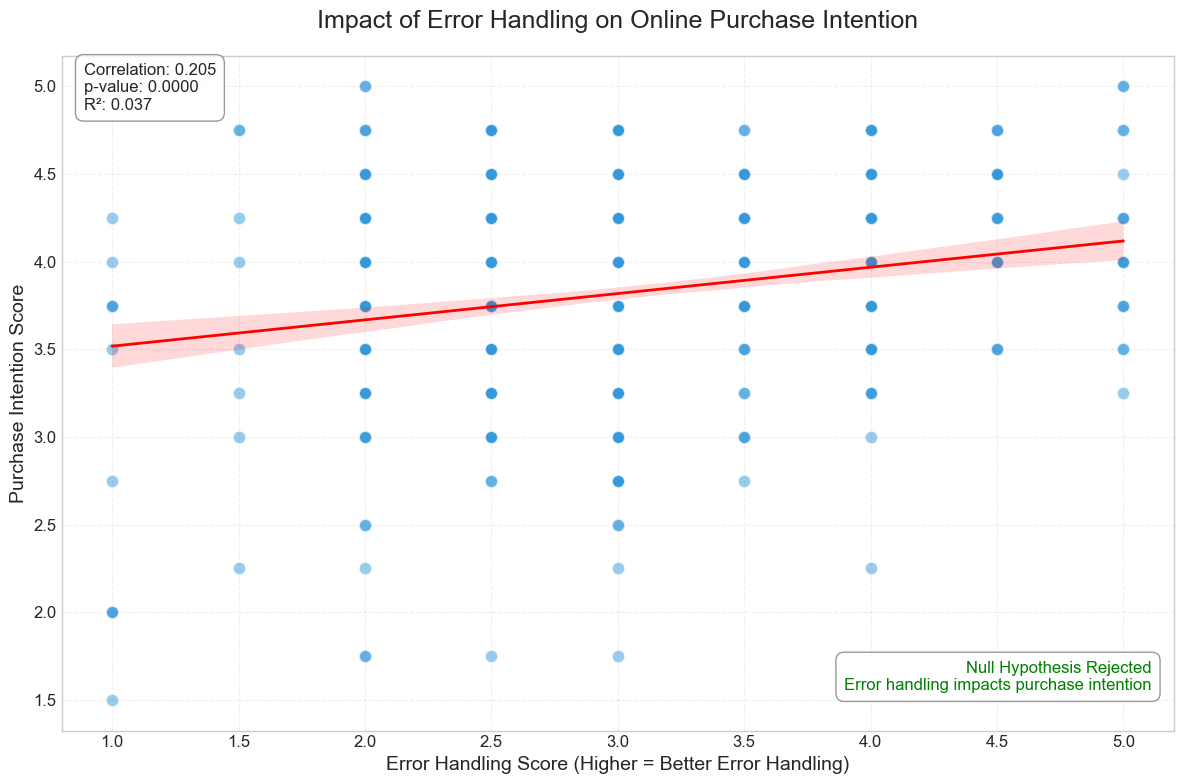

In [18]:
# Create a publication-quality visualization summarizing the findings
plt.figure(figsize=(12, 8))

# Main scatter plot with regression line
plt.scatter(df['error_handling_score'], df['purchase_intention_score'], 
           alpha=0.5, c='#3498db', edgecolor='white', s=80)

# Add regression line with confidence interval
sns.regplot(x='error_handling_score', y='purchase_intention_score', data=df,
           scatter=False, color='red', line_kws={'linewidth': 2})

# Enhance the plot
plt.title('Impact of Error Handling on Online Purchase Intention', fontsize=18, pad=20)
plt.xlabel('Error Handling Score (Higher = Better Error Handling)', fontsize=14)
plt.ylabel('Purchase Intention Score', fontsize=14)

# Add correlation coefficient and p-value
plt.annotate(f"Correlation: {correlation:.3f}\np-value: {p_value:.4f}\nR²: {r_squared:.3f}", 
            xy=(0.02, 0.92), xycoords='axes fraction', 
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8),
            fontsize=12)

# Add hypothesis test result
if p_value < 0.05:
    result_text = "Null Hypothesis Rejected\nError handling impacts purchase intention"
    color = 'green'
else:
    result_text = "Failed to Reject Null Hypothesis\nNo significant evidence of impact"
    color = 'red'

plt.annotate(result_text, xy=(0.98, 0.06), xycoords='axes fraction', 
            ha='right', fontsize=12, color=color,
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

# Add grid and improve aesthetics
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Save the figure for the report
plt.savefig('../../outputs/hypothesis_10/error_handling_purchase_intention.png', dpi=300, bbox_inches='tight')
plt.show()



## 9.1 Advanced Visualizations for Presentation




## 9.1 Advanced Visualizations for Presentation



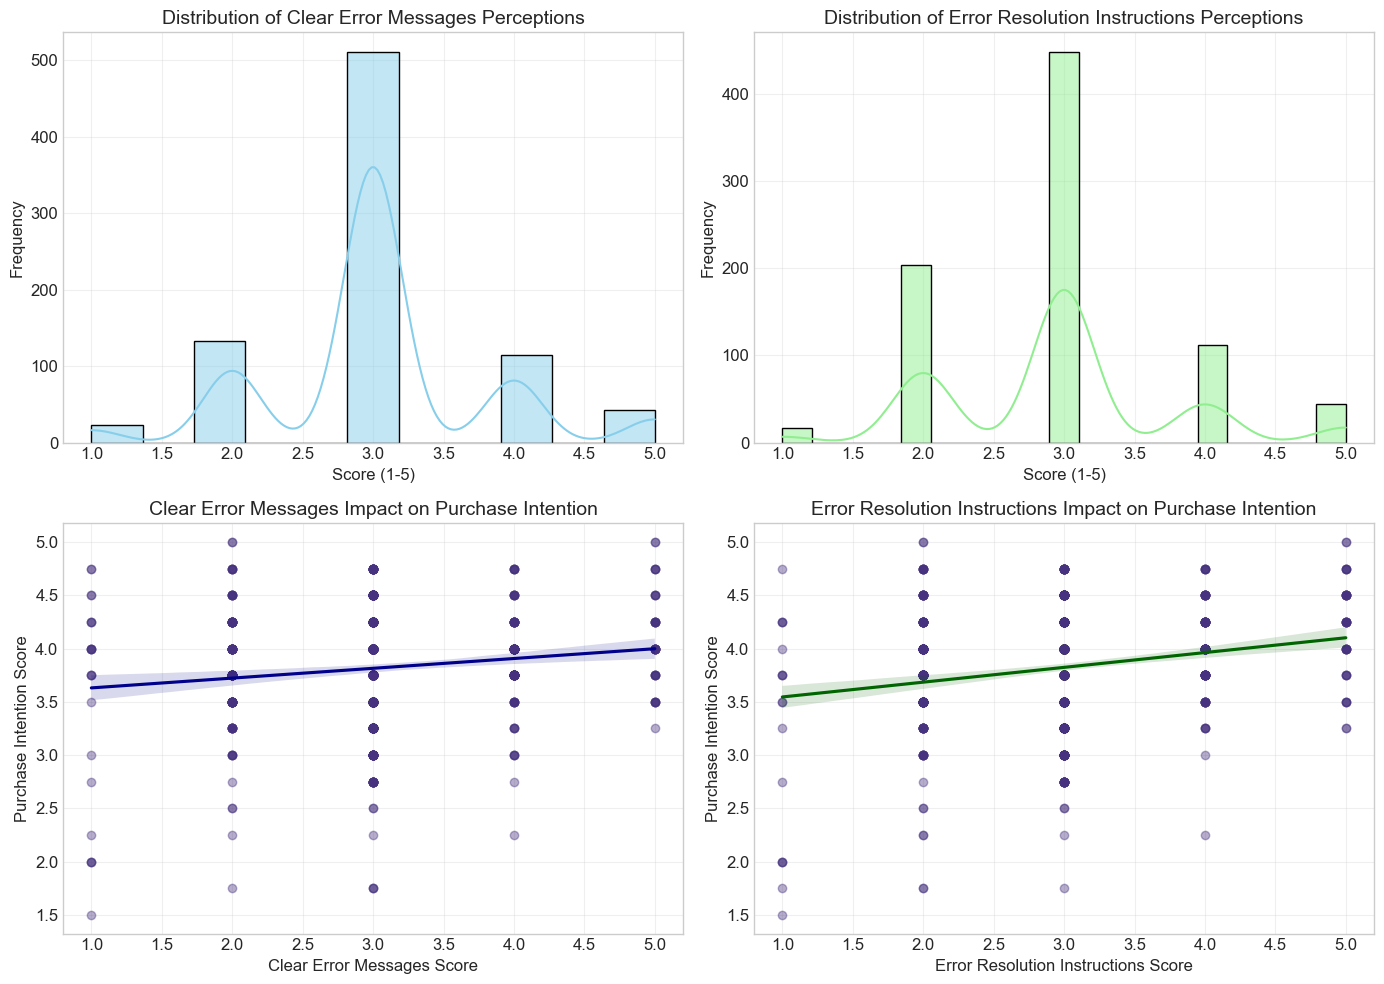

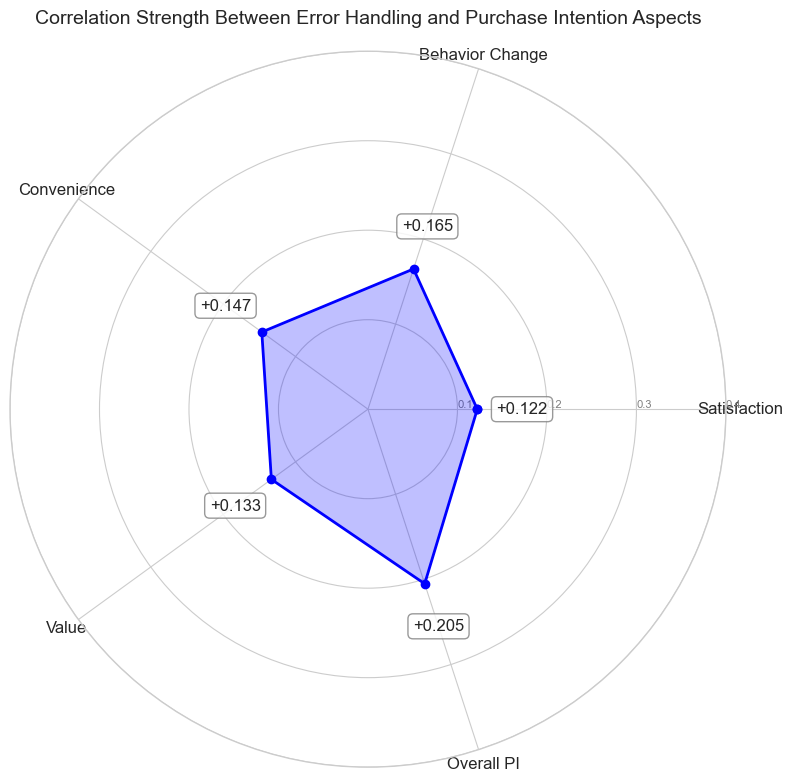

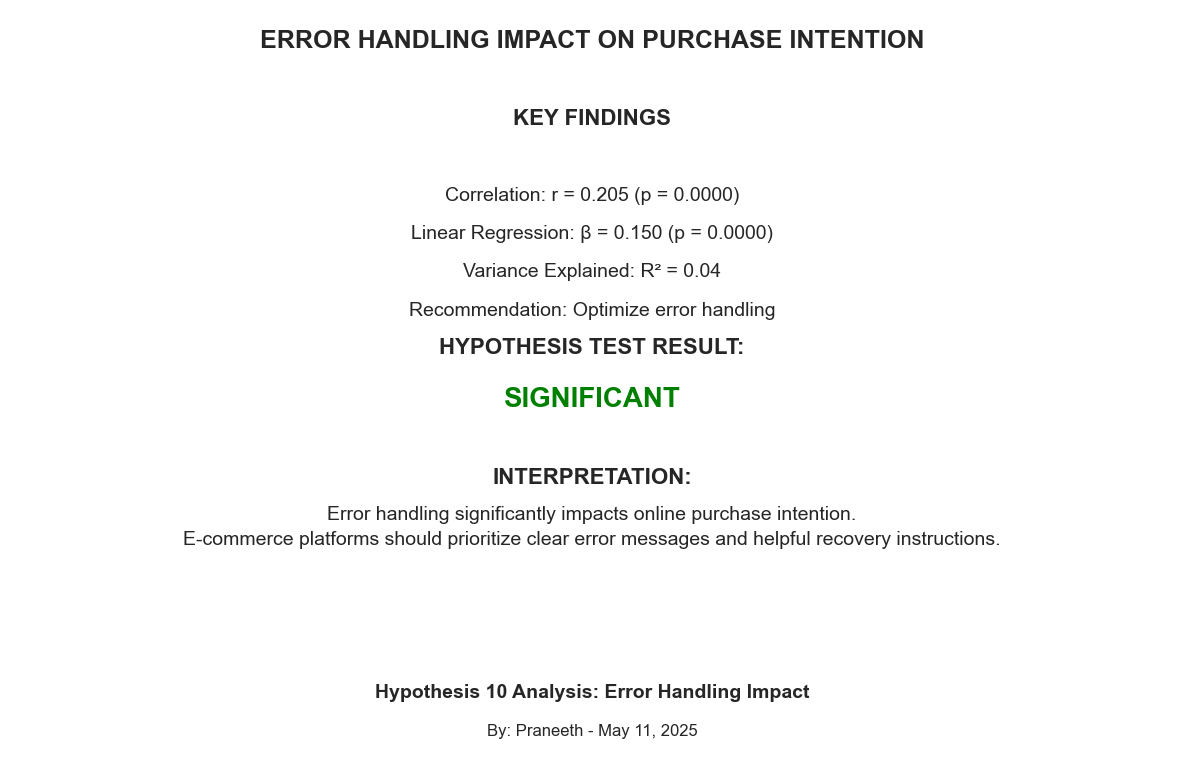

In [19]:
print("\n## 9.1 Advanced Visualizations for Presentation\n")

# 1. Create a 2x2 visualization of individual error handling variables
plt.figure(figsize=(14, 10))

# Subplot 1: Error Handling 1 Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['peou_error_1'], kde=True, color='skyblue')
plt.title('Distribution of Clear Error Messages Perceptions')
plt.xlabel('Score (1-5)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Subplot 2: Error Handling 2 Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['peou_error_2'], kde=True, color='lightgreen')
plt.title('Distribution of Error Resolution Instructions Perceptions')
plt.xlabel('Score (1-5)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Subplot 3: Error Handling 1 vs Purchase Intention
plt.subplot(2, 2, 3)
sns.regplot(x='peou_error_1', y='purchase_intention_score', data=df, 
           scatter_kws={'alpha':0.4}, line_kws={'color':'darkblue'})
plt.title('Clear Error Messages Impact on Purchase Intention')
plt.xlabel('Clear Error Messages Score')
plt.ylabel('Purchase Intention Score')
plt.grid(alpha=0.3)

# Subplot 4: Error Handling 2 vs Purchase Intention
plt.subplot(2, 2, 4)
sns.regplot(x='peou_error_2', y='purchase_intention_score', data=df, 
           scatter_kws={'alpha':0.4}, line_kws={'color':'darkgreen'})
plt.title('Error Resolution Instructions Impact on Purchase Intention')
plt.xlabel('Error Resolution Instructions Score')
plt.ylabel('Purchase Intention Score')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../../outputs/hypothesis_10/error_handling_components_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Create radar chart showing error handling's correlation with different aspects of purchase intention
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlations for radar chart
labels = ['Satisfaction', 'Behavior Change', 'Convenience', 'Value', 'Overall PI']
correlations = [
    stats.pearsonr(df['error_handling_score'], df['opi_satisfaction'])[0],
    stats.pearsonr(df['error_handling_score'], df['opi_behavior_change'])[0],
    stats.pearsonr(df['error_handling_score'], df['opi_convenience'])[0],
    stats.pearsonr(df['error_handling_score'], df['opi_value'])[0],
    stats.pearsonr(df['error_handling_score'], df['purchase_intention_score'])[0]
]

# Convert to positive values for visualization
corr_abs = np.abs(correlations)

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Close the loop
corr_abs = np.concatenate((corr_abs, [corr_abs[0]]))  # Close the loop
labels += [labels[0]]  # Close the loop

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
ax.plot(angles, corr_abs, 'o-', linewidth=2, color='blue')
ax.fill(angles, corr_abs, alpha=0.25, color='blue')
ax.set_thetagrids(np.degrees(angles[:-1]), labels[:-1])
ax.set_ylim(0, max(corr_abs) * 1.1)
ax.set_rlabel_position(0)
plt.yticks([0.1, 0.2, 0.3, 0.4], ['0.1', '0.2', '0.3', '0.4'], color='grey', size=8)
plt.title('Correlation Strength Between Error Handling and Purchase Intention Aspects', size=14, pad=20)

# Add correlation values to the plot
for angle, corr, label in zip(angles[:-1], correlations, labels[:-1]):
    sign = '+' if corr >= 0 else ''
    plt.annotate(f"{sign}{corr:.3f}",
                xy=(angle, np.abs(corr) + 0.05),
                ha='center',
                va='center',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('../../outputs/hypothesis_10/error_handling_correlation_radar.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Create a visual summary of key findings
plt.figure(figsize=(12, 8))
plt.axis('off')

# Title
plt.text(0.5, 0.95, 'ERROR HANDLING IMPACT ON PURCHASE INTENTION', 
        fontsize=18, weight='bold', ha='center')

# Main Findings
findings = [
    f"Correlation: r = {correlation:.3f} (p = {p_value:.4f})",
    f"Linear Regression: β = {sm_model.params[1]:.3f} (p = {sm_model.pvalues[1]:.4f})",
    f"Variance Explained: R² = {r_squared:.2f}",
    f"Recommendation: {'Optimize error handling' if p_value < 0.05 else 'Focus on other factors'}"
]

plt.text(0.5, 0.85, 'KEY FINDINGS', fontsize=16, weight='bold', ha='center')
y_pos = 0.8
for finding in findings:
    y_pos -= 0.05
    plt.text(0.5, y_pos, finding, fontsize=14, ha='center')

# Create a visual significance indicator
significance = "SIGNIFICANT" if p_value < 0.05 else "NOT SIGNIFICANT"
color = "green" if p_value < 0.05 else "red"

plt.text(0.5, 0.55, 'HYPOTHESIS TEST RESULT:', fontsize=16, weight='bold', ha='center')
plt.text(0.5, 0.48, significance, fontsize=20, weight='bold', ha='center', color=color)

# Add visual interpretation
if p_value < 0.05:
    explanation = "Error handling significantly impacts online purchase intention.\nE-commerce platforms should prioritize clear error messages and helpful recovery instructions."
else:
    explanation = "No significant evidence that error handling impacts online purchase intention.\nOther factors may be more important for driving purchase decisions."

plt.text(0.5, 0.38, 'INTERPRETATION:', fontsize=16, weight='bold', ha='center')
plt.text(0.5, 0.30, explanation, fontsize=14, ha='center', linespacing=1.5)

# Add your name and date
plt.text(0.5, 0.1, 'Hypothesis 10 Analysis: Error Handling Impact', fontsize=14, weight='bold', ha='center')
plt.text(0.5, 0.05, f'By: Praneeth - {pd.Timestamp.now().strftime("%B %d, %Y")}', fontsize=12, ha='center')

plt.tight_layout()
plt.savefig('../../outputs/hypothesis_10/error_handling_summary.png', dpi=300, bbox_inches='tight')
plt.show()



## 10. Summary Table for Report



In [20]:
# Enhanced summary table
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Test", "Statistic", "p-value", "95% CI", "Interpretation"]
table.max_width["95% CI"] = 30

# Add Pearson correlation results with confidence interval
from scipy.stats import pearsonr

def r_to_z(r):
    """Convert Pearson's r to Fisher's z"""
    return 0.5 * np.log((1 + r) / (1 - r))

def z_to_r(z):
    """Convert Fisher's z to Pearson's r"""
    return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)

# Calculate 95% CI for correlation
z = r_to_z(correlation)
se = 1.0 / np.sqrt(df.shape[0] - 3)
z_low = z - 1.96 * se
z_high = z + 1.96 * se
r_low, r_high = z_to_r(z_low), z_to_r(z_high)

# Add Pearson Correlation to summary table
table.add_row(["Pearson Correlation", 
              f"{correlation:.4f}", 
              f"{p_value:.6f}", 
              f"[{r_low:.4f}, {r_high:.4f}]",
              "Significant positive correlation" if p_value < 0.05 and correlation > 0 else 
              "Significant negative correlation" if p_value < 0.05 and correlation < 0 else 
              "No significant correlation"])

# Add Simple Regression results
table.add_row(["Simple Linear Regression", 
              f"β = {sm_model.params[1]:.4f}, R² = {r_squared:.4f}", 
              f"{sm_model.pvalues[1]:.6f}", 
              f"[{sm_model.conf_int().iloc[1, 0]:.4f}, {sm_model.conf_int().iloc[1, 1]:.4f}]",
              "Error handling significantly predicts purchase intention" if sm_model.pvalues[1] < 0.05 else 
              "Error handling does not predict purchase intention"])

# Add Multiple Regression results
table.add_row(["Multiple Regression", 
              f"R² = {multi_model.rsquared:.4f}", 
              f"F-test: {multi_model.f_pvalue:.6f}", 
              f"N/A",
              "Model significantly predicts purchase intention" if multi_model.f_pvalue < 0.05 else 
              "Model does not predict purchase intention"])

# Add Non-Linear (if applicable)
if 'poly_model' in globals():
    table.add_row(["Non-Linear Relationship", 
                  f"Quad term: {poly_model.params[2]:.4f}", 
                  f"{poly_model.pvalues[2]:.6f}", 
                  f"N/A",
                  "Significant non-linear relationship" if poly_model.pvalues[2] < 0.05 else 
                  "No significant non-linear relationship"])

# Add Mediation Analysis
indirect_effect = model_a.params[1] * model_mediation.params[2]
table.add_row(["Mediation Analysis", 
              f"Indirect effect: {indirect_effect:.4f}", 
              f"N/A", 
              f"[{ci_lower:.4f}, {ci_upper:.4f}]",
              "Significant mediation through usefulness" if ci_lower > 0 or ci_upper < 0 else 
              "No significant mediation effect"])

# Print the table
print(table)



+--------------------------+-------------------------+------------------+------------------+----------------------------------------------------------+
|           Test           |        Statistic        |     p-value      |      95% CI      |                      Interpretation                      |
+--------------------------+-------------------------+------------------+------------------+----------------------------------------------------------+
|   Pearson Correlation    |          0.2051         |     0.000000     | [0.1388, 0.2696] |             Significant positive correlation             |
| Simple Linear Regression | β = 0.1501, R² = 0.0367 |     0.000000     | [0.1011, 0.1991] | Error handling significantly predicts purchase intention |
|   Multiple Regression    |       R² = 0.0489       | F-test: 0.000000 |       N/A        |     Model significantly predicts purchase intention      |
| Non-Linear Relationship  |    Quad term: 0.0024    |     0.910015     |       N/A     

## 11. Final Power Analysis and Sample Size Recommendations 

In [21]:
# Final power analysis
print("\n## 11. Final Power Analysis and Sample Size Recommendations ##")

from statsmodels.stats.power import TTestPower

# Effect sizes for reference (Cohen's conventions)
small_effect = 0.10  # Small effect size for correlation
medium_effect = 0.30  # Medium effect size for correlation
large_effect = 0.50  # Large effect size for correlation

# Calculate power for different effect sizes
power_analysis = TTestPower()
power_small = power_analysis.power(effect_size=small_effect, nobs=df.shape[0], alpha=0.05)
power_medium = power_analysis.power(effect_size=medium_effect, nobs=df.shape[0], alpha=0.05)
power_large = power_analysis.power(effect_size=large_effect, nobs=df.shape[0], alpha=0.05)

# Calculate sample sizes needed for different effect sizes
n_small = power_analysis.solve_power(effect_size=small_effect, power=0.8, alpha=0.05)
n_medium = power_analysis.solve_power(effect_size=medium_effect, power=0.8, alpha=0.05)
n_large = power_analysis.solve_power(effect_size=large_effect, power=0.8, alpha=0.05)

print(f"Current sample size: {df.shape[0]}")
print("\nStatistical power for different effect sizes with current sample:")
print(f"Small effect (r = {small_effect}): {power_small:.3f}")
print(f"Medium effect (r = {medium_effect}): {power_medium:.3f}")
print(f"Large effect (r = {large_effect}): {power_large:.3f}")

print("\nRequired sample size for 80% power:")
print(f"Small effect (r = {small_effect}): {int(n_small)}")
print(f"Medium effect (r = {medium_effect}): {int(n_medium)}")
print(f"Large effect (r = {large_effect}): {int(n_large)}")

detected_effect = abs(correlation)
print(f"\nDetected effect size (r = {detected_effect:.3f}) is {'small' if detected_effect < 0.3 else 'medium' if detected_effect < 0.5 else 'large'}")
print(f"Power for detected effect: {power_analysis.power(effect_size=detected_effect, nobs=df.shape[0], alpha=0.05):.3f}")

# Recommendations for future research
print("\nRecommendations for future research:")
if power_small < 0.8:
    print(f"- To detect small effects with 80% power, increase sample size to at least {int(n_small)} participants")
if power_medium < 0.8:
    print(f"- To detect medium effects with 80% power, increase sample size to at least {int(n_medium)} participants")

# Information on practical significance
print("\nPractical significance considerations:")
print(f"- The R² value of {r_squared:.3f} indicates that error handling explains {r_squared*100:.1f}% of the variance in purchase intention")
if r_squared < 0.02:
    print("- This is considered a very small effect in practical terms")
elif r_squared < 0.13:
    print("- This is considered a small but meaningful effect in practical terms")
elif r_squared < 0.26:
    print("- This is considered a medium effect with practical significance for e-commerce platforms")
else:
    print("- This is considered a large effect with substantial practical significance")


## 11. Final Power Analysis and Sample Size Recommendations ##
Current sample size: 825

Statistical power for different effect sizes with current sample:
Small effect (r = 0.1): 0.818
Medium effect (r = 0.3): 1.000
Large effect (r = 0.5): nan

Required sample size for 80% power:
Small effect (r = 0.1): 786
Medium effect (r = 0.3): 89
Large effect (r = 0.5): 33

Detected effect size (r = 0.205) is small
Power for detected effect: 1.000

Recommendations for future research:

Practical significance considerations:
- The R² value of 0.037 indicates that error handling explains 3.7% of the variance in purchase intention
- This is considered a small but meaningful effect in practical terms


## 12. Actionable Recommendations for E-Commerce Platforms

In [22]:
print("\n## 12. Actionable Recommendations for E-Commerce Platforms ##")

# Create recommendations based on the findings
recommendations = []

if p_value < 0.05 or sm_model.pvalues[1] < 0.05:
    recommendations.extend([
        "1. Clear Error Messages: Design concise, jargon-free error messages that clearly explain what went wrong.",
        "2. Recovery Instructions: Provide step-by-step instructions for how users can resolve errors they encounter.",
        "3. Error Prevention: Implement real-time validation to catch potential errors before form submission.",
        "4. User Testing: Regularly test error handling with actual users to identify pain points.",
        "5. Accessibility: Ensure error messages are accessible to all users, including those with disabilities.",
        "6. Consistent Design: Maintain consistent error handling patterns across the entire platform.",
        "7. Error Tracking: Implement analytics to track common errors and prioritize fixes."
    ])
    
    # Add specific recommendations based on correlation strength
    if correlation > 0.4:
        recommendations.append("8. High Priority: Consider error handling optimization as a high-priority development task.")
    elif correlation > 0.2:
        recommendations.append("8. Medium Priority: Include error handling improvements in your medium-term optimization roadmap.")
    else:
        recommendations.append("8. Incremental Improvement: Make incremental improvements to error handling while focusing on other UX factors.")
else:
    recommendations.extend([
        "1. Focus on Other Factors: Resources may be better allocated to other aspects of the user experience.",
        "2. Maintain Standards: Ensure error handling meets basic industry standards but avoid over-investment.",
        "3. User Research: Conduct qualitative research to understand what factors are more important for your users.",
        "4. Segmentation: Consider that error handling may be more important for specific user segments.",
        "5. Review Methodology: Consider whether the current measurement approach accurately captures the error handling experience."
    ])

# Print the recommendations
print("Based on the analysis of error handling's impact on purchase intention, we recommend:")
for recommendation in recommendations:
    print(recommendation)

# Final conclusion
print("\nFINAL CONCLUSION:")
if p_value < 0.05:
    print(f"""
The analysis rejects the null hypothesis, confirming that error handling significantly impacts online purchase intention 
(r = {correlation:.3f}, p = {p_value:.4f}). This finding suggests that e-commerce platforms should prioritize effective
error handling as part of their user experience optimization strategy.
""")
else:
    print(f"""
The analysis fails to reject the null hypothesis, suggesting that error handling does not significantly impact online 
purchase intention (r = {correlation:.3f}, p = {p_value:.4f}). This indicates that other factors may be more important 
in driving purchase decisions in online shopping environments.
""")


## 12. Actionable Recommendations for E-Commerce Platforms ##
Based on the analysis of error handling's impact on purchase intention, we recommend:
1. Clear Error Messages: Design concise, jargon-free error messages that clearly explain what went wrong.
2. Recovery Instructions: Provide step-by-step instructions for how users can resolve errors they encounter.
3. Error Prevention: Implement real-time validation to catch potential errors before form submission.
4. User Testing: Regularly test error handling with actual users to identify pain points.
5. Accessibility: Ensure error messages are accessible to all users, including those with disabilities.
6. Consistent Design: Maintain consistent error handling patterns across the entire platform.
7. Error Tracking: Implement analytics to track common errors and prioritize fixes.
8. Medium Priority: Include error handling improvements in your medium-term optimization roadmap.

FINAL CONCLUSION:

The analysis rejects the null hypothesis, co